Final-project
İn financial markets there is two types of analysis,technical and fundemental.Technical analysis based on indicators which are derivated from price itself.So these indicators are used to predict stock market prices.I am gonna try to confirm that perspective.Can we predict stock market changes with these indicators ?I am planningto choose next month(T+1) stock market changes as a target variable and indicators as a predictive varible.
Algorithmich trading is getting more common on those days,eversince ı enter finance world these machines and softwares are fascinating me that's why ı want to start learning and building a my own algorithm.
my data source will be yahoofinance.com.I am gonna extract that via yfinance api.
At the end of this project ı am planning to evaluate results with RSME.

In [2]:
import pandas as pd
import talib
df=pd.read_excel("project1.xlsx")

In [3]:
#This section show how ı derived indicators from stock price
#I used library named talib to calculate İndicators
#Dependent Variable is next month percentage change of stock
#Data are monthly data of s&p 500 stocks.
a=df["Close"].values
b=df["High"].values
c=df["Low"].values
d=df["Open"].values
e=df["Volume"].values
df["UO"]=talib.ULTOSC(b,c, a, timeperiod1=3, timeperiod2=6, timeperiod3=12)
df["%Volume"]=((df["Volume"]/df["Close"]).pct_change())

df["ATR"]=talib.ATR(b,c,a,timeperiod=12)
df["%ATR"]=df["ATR"]/a
df["RSI"]=talib.RSI(a,timeperiod=12)
upperBB, middleBB, lowerBB = talib.BBANDS(a,timeperiod=12)
df["%B"]=(a-lowerBB)/(upperBB-lowerBB)
df["%EMA"]=(talib.EMA(a,timeperiod=12)/a)
df["%MOM"]=talib.MOM(a,timeperiod=12)/a
df["%SAR"]=(talib.SAR(b,c)/a)
df["%APO"]=(talib.APO(a, fastperiod=6, slowperiod=12, matype=0)/a)
df["BOP"]=talib.BOP(d,b,c,a)
df["AROONOSC"]=talib.AROONOSC(a,c, timeperiod=12)
df["CMO"]=talib.CMO(a, timeperiod=12)
macd, macdsignal, macdhist = talib.MACD(a, fastperiod=3, slowperiod=12, signalperiod=6)
df["%macd"]=(macd/a)

df["PPO"]=(talib.PPO(a, fastperiod=6, slowperiod=12))
df["WİLL"]=talib.WILLR(b,c,a, timeperiod=12)
df["MEDPRİCE/CLOSE"]=(talib.MEDPRICE(b,c)/a)
df["TrendMode"]=talib.HT_TRENDMODE(a)
df["DojiStar"]=talib.CDLDOJISTAR(d,b,c,a)
df["DragonFly"]=talib.CDLDRAGONFLYDOJI(d, b,c,a)
df["Engulfing"]=talib.CDLENGULFING(d,b,c,a)
df["GraveStone"]=talib.CDLGRAVESTONEDOJI(d,b,c,a)
df["Hammer"]=talib.CDLHAMMER(d,b,c,a)
df["HangingMan"]=talib.CDLHANGINGMAN(d,b,c,a)

df["Neck"]=talib.CDLINNECK(d,b,c,a)
df["FollowingMonthPctChange"]=df["Close"].pct_change()
df["FollowingMonthPctChange"]=df["FollowingMonthPctChange"].shift(-1)
df=df.dropna()
df = df.iloc[:-1 , :]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,TİCKER,UO,%Volume,...,MEDPRİCE/CLOSE,TrendMode,DojiStar,DragonFly,Engulfing,GraveStone,Hammer,HangingMan,Neck,FollowingMonthPctChange
0,0.105849,0.131218,0.104100,0.129469,4954051200,0.0,0.0,AAPL,74.383305,-0.092414,...,0.908784,0,0,0,0,0,0,0,0,-0.030410
1,0.129468,0.136904,0.113722,0.125531,4063360000,0.0,0.0,AAPL,68.186227,-0.154066,...,0.998258,0,0,0,0,0,0,0,0,-0.128918
2,0.125531,0.132093,0.104975,0.109348,5691638400,0.0,0.0,AAPL,55.772135,0.608025,...,1.084002,0,0,0,0,0,0,0,0,0.184003
3,0.108911,0.132967,0.107161,0.129469,3643516800,0.0,0.0,AAPL,56.109706,-0.459332,...,0.927364,0,0,0,100,0,0,0,0,-0.094595
4,0.129906,0.129906,0.110660,0.117221,3578198400,0.0,0.0,AAPL,51.781414,0.084677,...,1.026118,0,0,0,0,0,0,0,0,0.033580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36293,83.947673,85.255376,81.674544,82.762840,23866600,0.0,0.0,BDX,74.367754,0.038170,...,1.008484,1,0,0,0,0,0,0,0,0.045811
36294,82.771603,90.152681,81.893948,86.554298,22998900,0.0,0.0,BDX,68.916551,-0.078568,...,0.993865,1,0,0,0,0,0,0,0,0.002130
36295,86.852710,88.344727,82.718957,86.738617,18675900,0.0,0.0,BDX,62.367933,-0.189691,...,0.986087,1,-100,0,0,0,0,0,0,0.054787
36296,87.706563,92.602185,85.369014,91.490746,17950100,0.0,0.0,BDX,70.627366,-0.088785,...,0.972619,1,0,0,0,0,0,0,0,-0.061126


In [5]:
df.describe()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,UO,%Volume,ATR,...,MEDPRİCE/CLOSE,TrendMode,DojiStar,DragonFly,Engulfing,GraveStone,Hammer,HangingMan,Neck,FollowingMonthPctChange
count,36298.000000,36298.000000,36298.000000,36298.000000,3.629800e+04,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,...,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000,36298.000000
mean,56.880185,60.984180,53.619538,57.452759,3.010536e+08,0.000895,0.000619,55.515814,0.054110,6.513324,...,1.000468,0.840074,-1.071684,1.187393,-2.336217,1.471155,1.724613,-1.424321,-0.022040,0.016210
std,150.110604,160.912097,141.631266,152.061847,1.088423e+09,0.067073,0.037128,14.112801,0.458734,18.924001,...,0.080768,0.366543,15.256313,10.832020,33.064412,12.039736,13.018897,11.849357,1.484437,0.098014
min,0.104452,0.120485,0.079678,0.100620,3.318000e+05,0.000000,0.000000,1.116508,-0.913365,0.015089,...,0.654448,0.000000,-100.000000,0.000000,-100.000000,0.000000,0.000000,-100.000000,-100.000000,-0.696473
25%,8.484767,9.207383,7.935610,8.618167,4.676738e+07,0.000000,0.000000,46.014550,-0.200933,0.967946,...,0.968550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.031361
50%,24.069902,25.810027,22.394358,24.201744,1.024414e+08,0.000000,0.000000,56.110152,-0.028448,2.807493,...,0.992846,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014664
75%,53.989356,57.157607,51.059656,54.267535,2.199043e+08,0.000000,0.000000,65.797016,0.199398,5.550504,...,1.020472,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060605
max,3496.399902,3773.080078,3306.979980,3470.790039,4.142671e+10,10.000000,3.000000,94.202539,22.543583,389.065153,...,2.391985,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000,0.000000,2.065218


<AxesSubplot:>

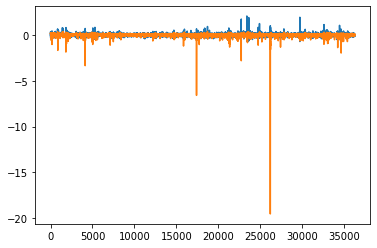

In [20]:
df["FollowingMonthPctChange"].plot()
df["%macd"].plot()


<AxesSubplot:>

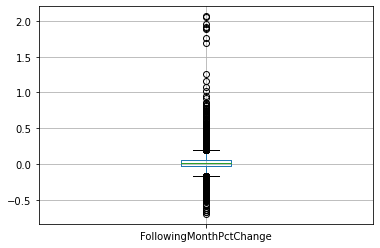

In [21]:
pd.DataFrame(df["FollowingMonthPctChange"]).boxplot()

<AxesSubplot:ylabel='Frequency'>

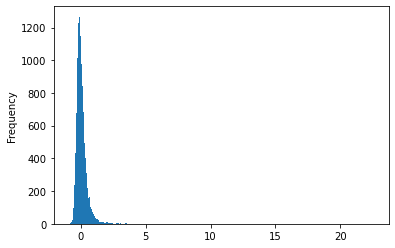

In [25]:
df["%Volume"].plot.hist(bins=1000)

In [26]:
df.corr()
df["FollowingMonthPctChange"].mean()
df["FollowingMonthPctChange"].std()


0.09801440571761845